In [62]:
import cPickle as pic
import numpy as np
import matplotlib.pyplot as plt
from Bio import Seq
import operator
import seaborn as sns
import pandas as pd

In [2]:
good_reads = pic.load(open("data/good_reads.pkl", "rb"))
WT = "ATGGATGTATTCATGAAAGGACTTTCAAAGGCCAAGGAGGGAGTTGTGGCTGCTGCTGAGAAAACCAAACAGGGTGTGGCAGAAGCAGCAGGAAAGACAAAAGAGGGTGTTCTCTATGTAGGCTCCAAAACCAAGGAGGGAGTGGTGCATGGTGTGGCAACAGTGGCTGAGAAGACCAAAGAGCAAGTGACAAATGTTGGAGGAGCAGTGGTGACGGGTGTGACAGCAGTAGCCCAGAAGACAGTGGAGGGAGCAGGGAGCATTGCAGCAGCCACTGGCTTTGTCAAAAAGGACCAGTTGGGCAAGAATGAAGAAGGAGCCCCACAGGAAGGAATTCTGGAAGATATGCCTGTGGATCCTGACAATGAGGCTTATGAAATGCCTTCTGAGGAAGGGTATCAAGACTACGAACCTGAAGCC"

In [3]:
print(good_reads[0])
aa_num = pic.load(open("data/aminotonumber.pkl", "rb"))

('AAATCACACAGATGCAACACATGAGA', 'ATGGATGTATTCATGAAAGGACTTTCAAAGGCCAAGGAGGGAGTTGTGGCTGCTGCTGAGAAAACCAAACAGGGTGTGGCAGAAGCAGCAGGAAAGACAAAAGAGCTCTCTAGAGGGCCGCATCATGTAATTAGTTATATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAACAACAAAGAGCCTATCAAAAGTATTGGAAATAGTAATACATCAAATCGCTGTGCTGATGGTATCAATAGAATGACCATGAGTAGTAGATATGCTTTCAACATATTCTTGATGAATAAATAGAAAGTAAAGTTTTAAAAGGTCAAGAGGGGTTTTGGTGTCGATTGTATGAATAATAAACAGAGTGTATAAGAAGCTAGAGAAAAGAAACAACGGTTATTAAGATGGCTTCATGTTGTCATTTCTTAT', [16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 15, 18, 18, 18, 11, 17, 16, 17, 17, 18, 18, 18, 18, 17, 18, 18, 16, 17, 16, 16, 14, 14, 18, 16, 15, 18, 17, 18, 18, 18, 18, 18, 18, 18, 18, 

In [4]:
aa_pos_count = np.zeros((20, len(WT)/3))
aa_pos_count.shape

(20, 140)

In [5]:
def convert_to_aa(seq):
    return str(Seq.translate(seq))

In [54]:
wt_aa = convert_to_aa(WT)
print(wt_aa)

def get_mutations(seq1, seq2):
    ## Get list of mutations between seq1 and seq2, with seq1 as the reference (i.e. return 
    ## mutations in seq2)
    mutations = []
    for i in range(len(seq1)):
        # If we find a codon mutation, then we add a tuple entry to our list (pos, mutation)
        if seq1[i] != seq2[i] and seq2[i] != "*":
            mutations.append((i, seq2[i]))
    return mutations

MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA


In [55]:
for i in good_reads:
    seq = convert_to_aa(i[1])
    muts = get_mutations(wt_aa, seq)
    for m in muts:
        aa_pos_count[aa_num[m[1]]-1, m[0]] += 1

In [8]:
print(aa_pos_count)

[[  11053.   11749.   10939. ...,    9991.   10710.    9800.]
 [  26930.   29233.   29997. ...,  253631.  813025.  118104.]
 [  21048.   20894.   20176. ...,   23123.   57080.  962649.]
 ..., 
 [  41271.   37633.   36933. ...,   38078.   34513.   34836.]
 [  21064.       0.   19621. ...,   20728.   21987.   37972.]
 [  22364.   23158.   23585. ...,   23044.       0.   23171.]]


In [10]:
norm_factor = np.sum(aa_pos_count, axis=0)
norm_aa_pos_count = aa_pos_count / norm_factor

In [14]:
## Expected percent per amino acid at each position = 5% (1/20)

aa_mean_percent = np.mean(norm_aa_pos_count, 1)

# Bias = empirical mean - expectation
expectation = np.zeros((20,1)) + 0.05
bias = abs(aa_mean_percent - expectation.T) / 0.05
variance = (aa_mean_percent - expectation.T)**2

num_aa = sorted(aa_num, key=aa_num.get)[1:]
x = np.arange(20)

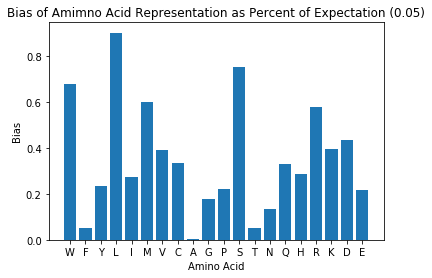

In [15]:
# Plot bias as function of amino acid

plt.bar(x, bias.T)
plt.title("Bias of Amimno Acid Representation as Percent of Expectation (0.05)")
plt.xlabel("Amino Acid")
plt.ylabel("Bias")
plt.xticks(x, num_aa)
plt.show()

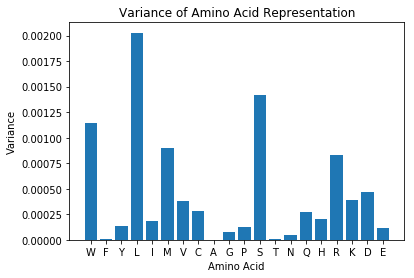

In [16]:
# Plot variance as function of amino acid 
# Plot bias as function of amino acid

plt.bar(x, variance.T)
plt.title("Variance of Amino Acid Representation")
plt.xlabel("Amino Acid")
plt.ylabel("Variance")
plt.xticks(x, num_aa)
plt.show()

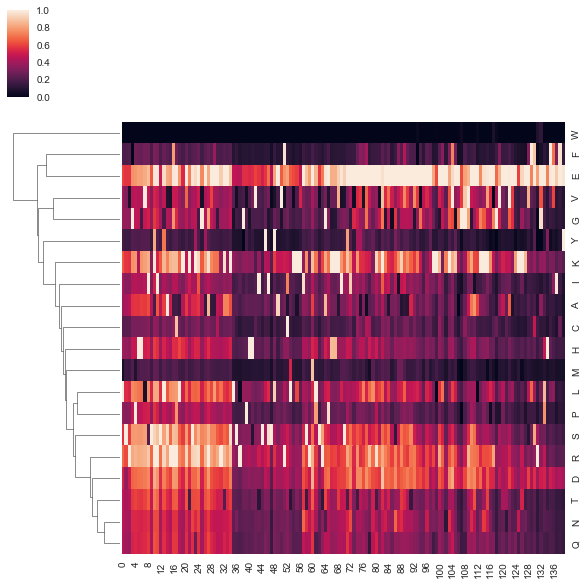

In [74]:
## Create heatmap of mutation frequencies
get_ipython().magic(u'matplotlib inline')

row_labels = num_aa

df = pd.DataFrame(aa_pos_count, index=row_labels)

sns.set(color_codes=True)
g = sns.clustermap(df, metric="correlation", col_cluster=False, standard_scale=1)
